In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
df_email = pd.read_csv("email_classification_dataset.csv")

df_email.head() # ilk beş satır

,id,email,label
0,2685,From: support@legitcompany.com\nSubject: Regar...,ham
1,5857,From: noreply@softwareupdates.com\nSubject: We...,ham
2,2399,From: noreply@softwareupdates.com\nSubject: Im...,ham
3,3244,From: info@customerservice.co\nSubject: Team S...,ham
4,2844,From: info@customerservice.co\nSubject: Team S...,ham


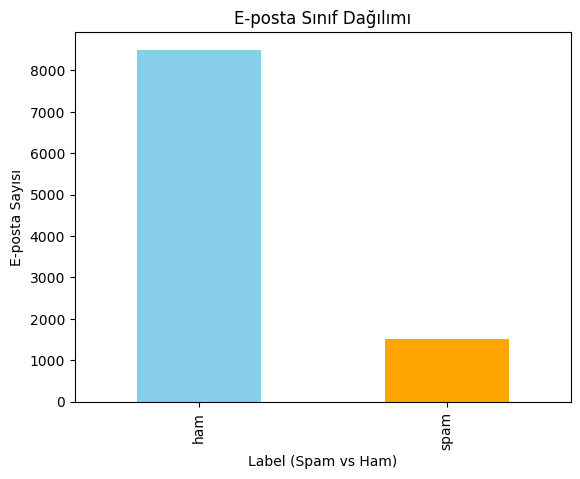

In [4]:
# e-posta sınıf dağılımı görelim
df_email['label'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title("E-posta Sınıf Dağılımı")
plt.xlabel("Label (Spam vs Ham)")
plt.ylabel("E-posta Sayısı")
plt.show()

In [11]:
df_email.groupby('label')['word_count'].mean()  # ortalama kelime sayısı (sınıfa göre)

label
ham     39.002588
spam    26.344000
Name: word_count, dtype: float64

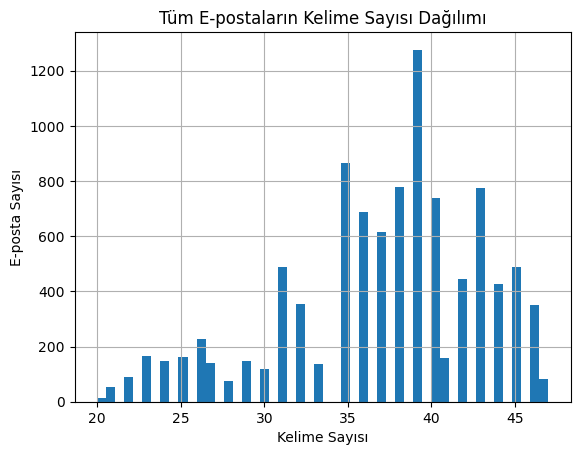

In [13]:
#Kelime sayısı dağılımı
df_email['word_count'].hist(bins=50)
plt.title("Tüm E-postaların Kelime Sayısı Dağılımı")
plt.xlabel("Kelime Sayısı")
plt.ylabel("E-posta Sayısı")
plt.show()

In [16]:
#Spam larda en çok geçen kelimeler

from collections import Counter
import re

# Sadece spam e-postaları alıyoruz
spam_emails = df_email[df_email['label'] == 'spam']['email'].astype(str)

# Hepsini birleştiriyoruz.
spam_text = " ".join(spam_emails)

#Temizle: noktalama, rakamlar, büyük harfler
spam_text = re.sub(r'[^a-zA-Z\s]', '', spam_text).lower()

# Kelimelere ayır
spam_words = spam_text.split()

# Kelime frekanslarını say
spam_counts = Counter(spam_words)

# En çok geçen 20 kelimeyi göster
most_common_spam = spam_counts.most_common(20)
for word, count in most_common_spam:
    print(f"{word}: {count}")


your: 2229
from: 1924
subject: 1500
link: 1356
to: 723
new: 603
of: 565
account: 479
for: 461
a: 461
on: 455
security: 450
login: 450
please: 447
been: 445
you: 442
our: 439
the: 423
is: 413
immediately: 328


In [17]:
#Normal epostalarda en çok geçen kelimeler

# Sadece ham (normal) e-postaları alıyoruz.
ham_emails = df_email[df_email['label'] == 'ham']['email'].astype(str)

# Hepsini birleştiriyoruz.
ham_text = " ".join(ham_emails)

# Temizle: sadece harf ve boşluk, küçük harf yap
ham_text = re.sub(r'[^a-zA-Z\s]', '', ham_text).lower()

# Kelimelere ayıralım.
ham_words = ham_text.split()

# Kelimeleri sayalım
ham_counts = Counter(ham_words)

# En çok geçen 20 kelime
most_common_ham = ham_counts.most_common(20)
for word, count in most_common_ham:
    print(f"{word}: {count}")

your: 15509
from: 11896
to: 11101
you: 9362
subject: 8500
the: 6651
a: 5205
for: 5157
please: 5090
link: 4265
and: 4255
team: 4242
our: 4194
recent: 3465
thank: 3455
software: 3407
is: 3334
survey: 2691
feedback: 2659
we: 2598


In [20]:
#link içeriyor mu?
df_email['has_link'] = df_email['email'].str.contains('http|www', case=False, na=False).astype(int)
df_email.groupby('label')['has_link'].mean()

label
ham     0.0
spam    0.0
Name: has_link, dtype: float64

In [23]:
# Spam tetikleyici kelime sayısını bulalım.
spam_triggers = ['free', 'winner', 'buy now', 'urgent', 'guarantee', 'act now', 'limited', 'money', 'credit', 'win']
df_email['trigger_count'] = df_email['email'].apply(
    lambda x: sum(1 for word in spam_triggers if word in str(x).lower())
)
df_email.groupby('label')['trigger_count'].mean()

label
ham     0.000000
spam    1.179333
Name: trigger_count, dtype: float64

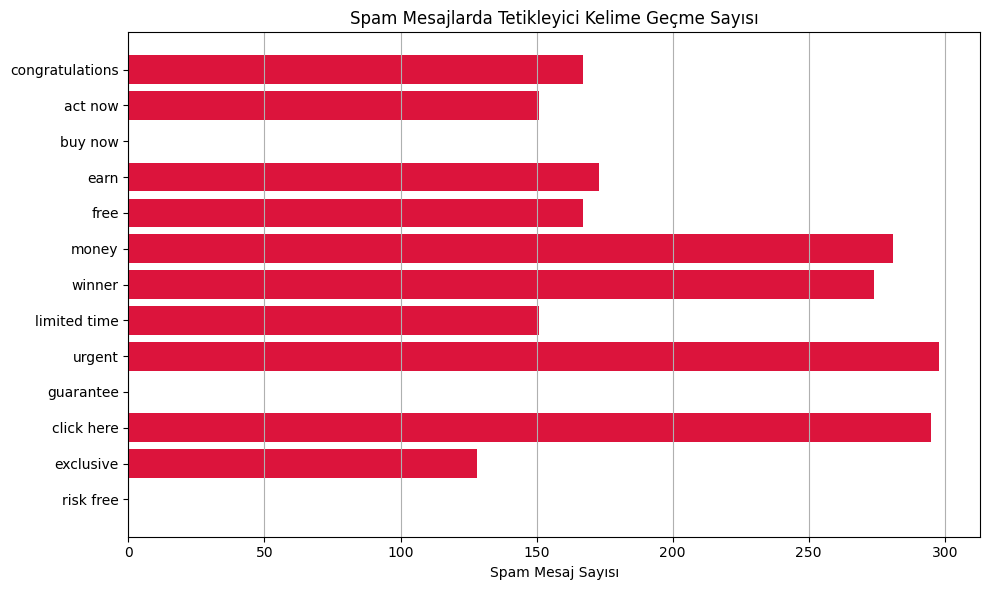

In [27]:
#Tetikleyici kelimelerden hangisi spamlarda ne kadar geçiyor?

# Sadece spam mesajları alalım.
spam_texts = df_email[df_email['label'] == 'spam']['email'].astype(str).str.lower()

# Tetikleyici kelimeler
spam_triggers = [
    'congratulations',
    'act now',
    'buy now',
    'earn',
    'free',
    'money',
    'winner',
    'limited time',
    'urgent',
    'guarantee',
    'click here',
    'exclusive',
    'risk free'
]

# Her kelimenin kaç spam mesajda geçtiğini sayalım.
trigger_counts = {}

for trigger in spam_triggers:
    pattern = r'\b' + re.escape(trigger) + r'\b'
    count = spam_texts.apply(lambda x: bool(re.search(pattern, x))).sum()
    trigger_counts[trigger] = count

# Grafik
plt.figure(figsize=(10, 6))
plt.barh(list(trigger_counts.keys()), list(trigger_counts.values()), color='crimson')
plt.xlabel("Spam Mesaj Sayısı")
plt.title("Spam Mesajlarda Tetikleyici Kelime Geçme Sayısı")
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()
